In [276]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.imshow(f, cmap=plt.cm.gray)<matplotlib.image.AxesImage object at 0x...>
%matplotlib inline

def load_data():
    train_dataset = h5py.File('./../archive/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('./../archive/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# np.random.seed(1)

In [277]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [278]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x_flatten = train_x_flatten/255
test_x_flatten = test_x_flatten/255

In [279]:
def initialiseParams(n_x):
    W = np.random.randn(n_x, 1)*0.01
    b = 0
    
    return W, b

In [280]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [303]:
def Prop(X, W, b, Y, i):
    n_x = X.shape[0]
    m = X.shape[1]
    
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    
#     print('====================')
#     print(m, 'i: ', i)
    cost = -np.sum(np.dot(Y, np.log(A).T) + np.dot(1-Y, np.log(1-A).T))/m
#     print('cost: ', cost)
#     print('====================')
    AY = A-Y
    dW = np.dot(X, AY.T)/m
    db = np.sum(AY)/m
    grads = {'dW': dW, 'db': db}
    return grads, cost

In [304]:
def optimize(W, b, X, Y, num_itr=1000, alpha=0.05, print_cost=False):
    costs = []
    
    for i in range(num_itr):
        grads, cost = Prop(X, W, b, Y, i)
        
        dW, db = grads['dW'], grads['db']
        W = W - np.dot(alpha, dW)
        b = b - alpha*db
        
        if i%100 == 0:
            costs.append(cost)
        
        if print_cost and i%100 == 0:
            print('cost at itr:', i, 'is:', cost)
    
    grads['dW'] = dW
    grads['db'] = db
    
    params = {'W': W, 'b': b}
    
    return params, grads, cost

In [305]:
def predict(W, b, X):
    predictY = np.zeros((1, X.shape[1]))
    
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    
    for i in range(A.shape[1]):
        if A[0][i] > 0.5:
            predictY[0][i] = 1
        else:
            predictY[0][i] = 0

    return predictY

In [340]:
def model(X_train, Y_train, X_test, Y_test, num_itr=1000, alpha=0.01, print_cost=False):
    n_x, m = X_train.shape[0], X_train.shape[1]
    
    W, b = initialiseParams(n_x)
    
    prams, grads, costs = optimize(W, b, X_train, Y_train, num_itr, alpha, True)
    
    W = prams['W']
    b = prams['b']
    
    Y_predict_test = predict(W, b, X_test)
    Y_predict_train = predict(W, b, X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_predict_test, 
         "Y_prediction_train" : Y_predict_train, 
         "w" : W, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": num_itr}
    return d

In [341]:
d = model(train_x_flatten, train_y, test_x_flatten, test_y)

cost at itr: 0 is: 0.6684941354579915
cost at itr: 100 is: 0.5046153261963007
cost at itr: 200 is: 0.4155116313407157
cost at itr: 300 is: 0.6168003842084295
cost at itr: 400 is: 0.5248444467775341
cost at itr: 500 is: 0.3915400269550409
cost at itr: 600 is: 0.2386467416728937
cost at itr: 700 is: 0.1560149397311191
cost at itr: 800 is: 0.13593060657993938
cost at itr: 900 is: 0.12543490094296894
train accuracy: 98.56459330143541 %
test accuracy: 72.0 %


In [337]:
y_predict = d['Y_prediction_test']

i: 0 predicted: 1 vs is cat: 1


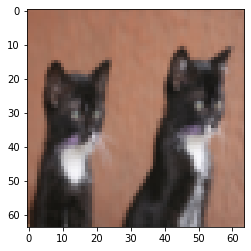

------------------------------
i: 1 predicted: 1 vs is cat: 1


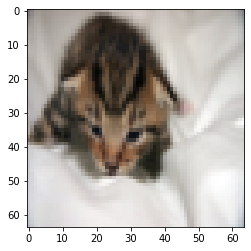

------------------------------
i: 2 predicted: 1 vs is cat: 1


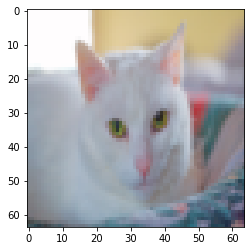

------------------------------
i: 3 predicted: 1 vs is cat: 1


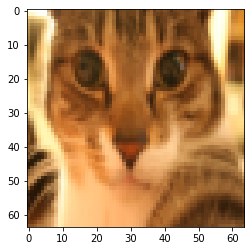

------------------------------
i: 4 predicted: 1 vs is cat: 1


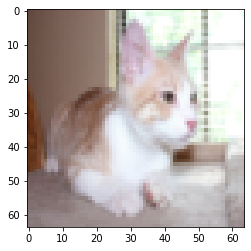

------------------------------
i: 5 predicted: 1 vs is cat: 0


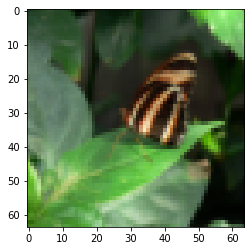

------------------------------
i: 6 predicted: 0 vs is cat: 1


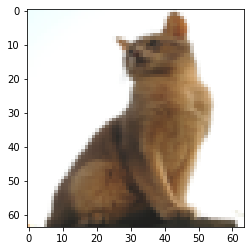

------------------------------
i: 7 predicted: 1 vs is cat: 1


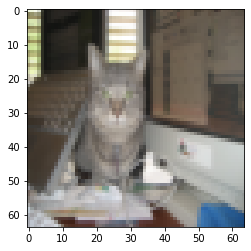

------------------------------
i: 8 predicted: 1 vs is cat: 1


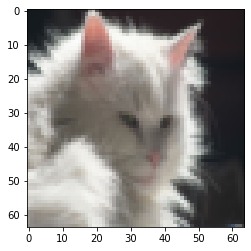

------------------------------
i: 9 predicted: 1 vs is cat: 1


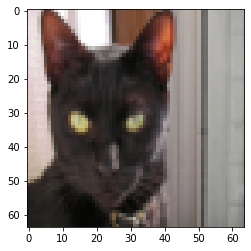

------------------------------
i: 10 predicted: 0 vs is cat: 1


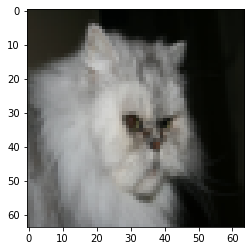

------------------------------
i: 11 predicted: 1 vs is cat: 1


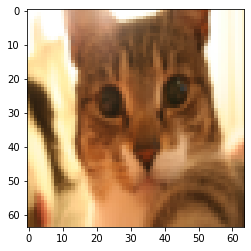

------------------------------
i: 12 predicted: 1 vs is cat: 1


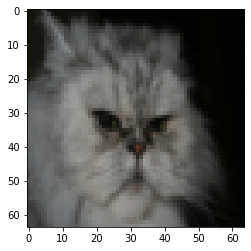

------------------------------
i: 13 predicted: 1 vs is cat: 0


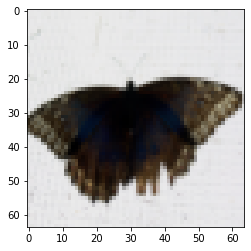

------------------------------
i: 14 predicted: 0 vs is cat: 0


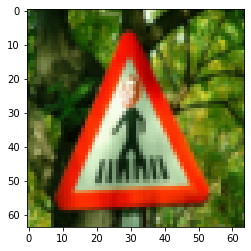

------------------------------
i: 15 predicted: 1 vs is cat: 1


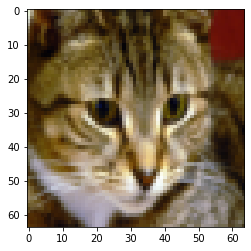

------------------------------
i: 16 predicted: 0 vs is cat: 0


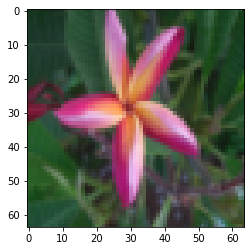

------------------------------
i: 17 predicted: 1 vs is cat: 1


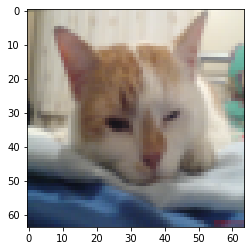

------------------------------
i: 18 predicted: 0 vs is cat: 1


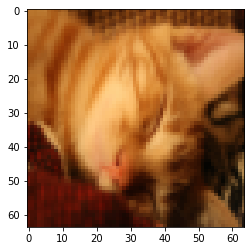

------------------------------
i: 19 predicted: 0 vs is cat: 1


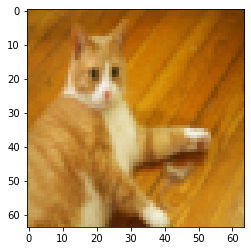

------------------------------
i: 20 predicted: 1 vs is cat: 1


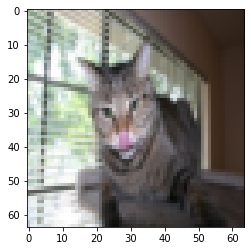

------------------------------
i: 21 predicted: 0 vs is cat: 0


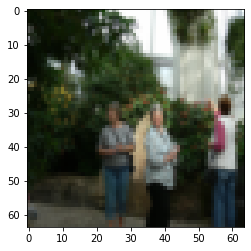

------------------------------
i: 22 predicted: 0 vs is cat: 0


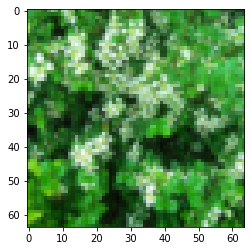

------------------------------
i: 23 predicted: 1 vs is cat: 1


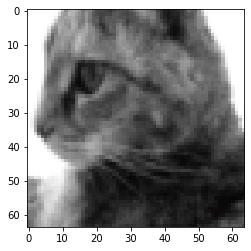

------------------------------
i: 24 predicted: 1 vs is cat: 1


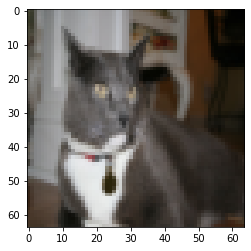

------------------------------
i: 25 predicted: 1 vs is cat: 1


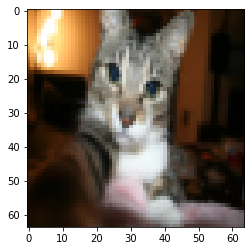

------------------------------
i: 26 predicted: 1 vs is cat: 1


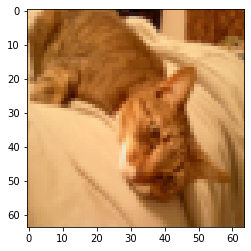

------------------------------
i: 27 predicted: 0 vs is cat: 0


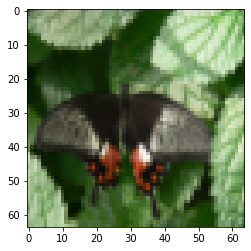

------------------------------
i: 28 predicted: 0 vs is cat: 1


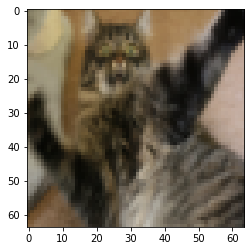

------------------------------
i: 29 predicted: 1 vs is cat: 0


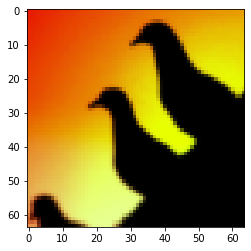

------------------------------
i: 30 predicted: 0 vs is cat: 1


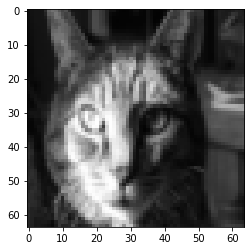

------------------------------
i: 31 predicted: 1 vs is cat: 1


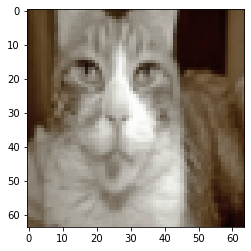

------------------------------
i: 32 predicted: 1 vs is cat: 1


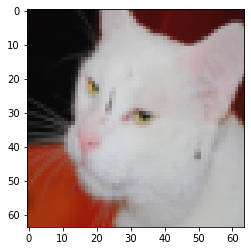

------------------------------
i: 33 predicted: 0 vs is cat: 1


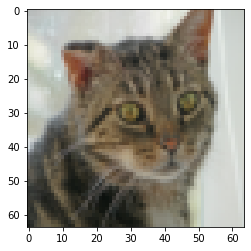

------------------------------
i: 34 predicted: 1 vs is cat: 0


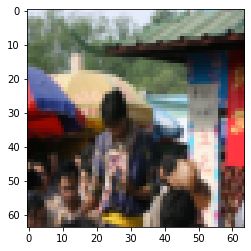

------------------------------
i: 35 predicted: 0 vs is cat: 0


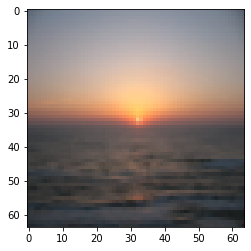

------------------------------
i: 36 predicted: 0 vs is cat: 0


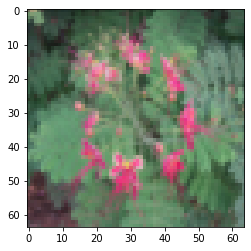

------------------------------
i: 37 predicted: 1 vs is cat: 1


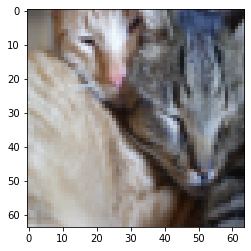

------------------------------
i: 38 predicted: 0 vs is cat: 0


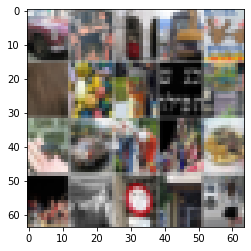

------------------------------
i: 39 predicted: 0 vs is cat: 0


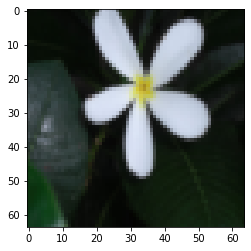

------------------------------
i: 40 predicted: 1 vs is cat: 1


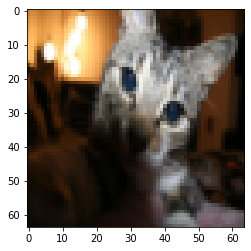

------------------------------
i: 41 predicted: 0 vs is cat: 1


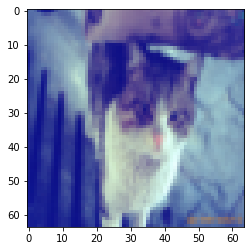

------------------------------
i: 42 predicted: 1 vs is cat: 1


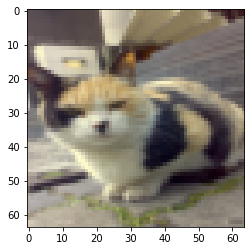

------------------------------
i: 43 predicted: 0 vs is cat: 0


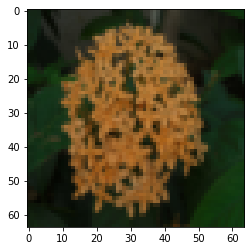

------------------------------
i: 44 predicted: 1 vs is cat: 0


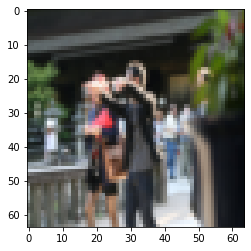

------------------------------
i: 45 predicted: 1 vs is cat: 0


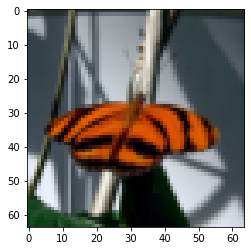

------------------------------
i: 46 predicted: 0 vs is cat: 1


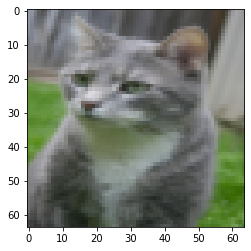

------------------------------
i: 47 predicted: 1 vs is cat: 1


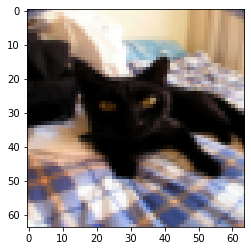

------------------------------
i: 48 predicted: 1 vs is cat: 1


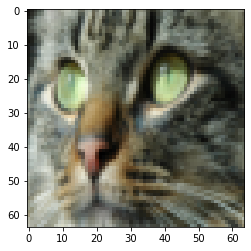

------------------------------
i: 49 predicted: 0 vs is cat: 0


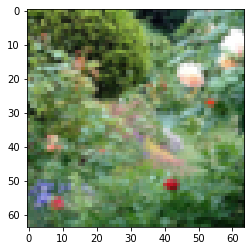

------------------------------


In [330]:
for i in range(test_x_orig.shape[0]):
    print('i:', i, 'predicted:', int(y_predict[0][i]), 'vs is cat:', test_y[0][i])
    plt.imshow(test_x_orig[i])
    plt.show()
    print('------------------------------')